In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/OFFLINE DATA/OFFLINE DATASETS/Final Dataset.csv')

In [ ]:
dataset.head()

,Gender,Attendance,Absence,"Midterm for 2019-2020, Fall [ 100 / 40% ]","Finalterm for 2019-2020, Fall [ 100 / 60% ]",Total,Class
0,Male,5.0,5.0,90,73.0,81.5,Medium performer
1,Female,4.0,6.0,70,78.0,74.0,Medium performer
2,Male,6.0,4.0,-2,-2.0,-2.0,Dropped
3,Male,8.0,2.0,45,73.0,59.0,Low Performer
4,Female,9.0,1.0,83,97.0,90.0,High Performer


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Gender                                       384 non-null    object 
 1   Attendance                                   384 non-null    float64
 2   Absence                                      384 non-null    float64
 3   Midterm for 2019-2020, Fall [ 100 / 40% ]    384 non-null    int64  
 4   Finalterm for 2019-2020, Fall [ 100 / 60% ]  383 non-null    float64
 5   Total                                        384 non-null    float64
 6   Class                                        384 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 21.1+ KB


In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Finalterm for 2019-2020, Fall [ 100 / 60% ]']])
dataset['Finalterm for 2019-2020, Fall [ 100 / 60% ]']=impute.transform(dataset[['Finalterm for 2019-2020, Fall [ 100 / 60% ]']])

In [ ]:
dataset['Class'].value_counts()

Low Performer       126
Medium performer    107
High Performer       96
Failure              48
Dropped               7
Name: Class, dtype: int64

In [ ]:
X = dataset.iloc[:,:-2].values

In [ ]:
Y = dataset.iloc[:, 6].values

In [ ]:
X

array([['Male', 5.0, 5.0, 90, 73.0],
       ['Female', 4.0, 6.0, 70, 78.0],
       ['Male', 6.0, 4.0, -2, -2.0],
       ...,
       ['Male', 7.0, 3.0, 60, 55.0],
       ['Female', 7.0, 3.0, 52, 37.0],
       ['Female', 8.5, 1.5, 55, 40.0]], dtype=object)

In [ ]:
Y

array(['Medium performer', 'Medium performer', 'Dropped', 'Low Performer',
       'High Performer', 'High Performer', 'Medium performer',
       'High Performer', 'Medium performer', 'Medium performer',
       'High Performer', 'High Performer', 'High Performer',
       'Medium performer', 'High Performer', 'High Performer',
       'High Performer', 'Medium performer', 'Medium performer',
       'High Performer', 'Low Performer', 'Low Performer',
       'High Performer', 'Medium performer', 'Low Performer',
       'Medium performer', 'Medium performer', 'High Performer',
       'High Performer', 'Medium performer', 'High Performer',
       'Low Performer', 'Medium performer', 'Medium performer',
       'High Performer', 'High Performer', 'High Performer',
       'High Performer', 'High Performer', 'Medium performer',
       'Medium performer', 'Medium performer', 'Medium performer',
       'High Performer', 'Medium performer', 'High Performer',
       'High Performer', 'High Performer'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 1.0 5.0 5.0 90 73.0]
 [1.0 0.0 4.0 6.0 70 78.0]
 [0.0 1.0 6.0 4.0 -2 -2.0]
 ...
 [0.0 1.0 7.0 3.0 60 55.0]
 [1.0 0.0 7.0 3.0 52 37.0]
 [1.0 0.0 8.5 1.5 55 40.0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [ ]:
print(Y)

[4 4 0 3 2 2 4 2 4 4 2 2 2 4 2 2 2 4 4 2 3 3 2 4 3 4 4 2 2 4 2 3 4 4 2 2 2
 2 2 4 4 4 4 2 4 2 2 2 3 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 4 4 4 2 2 4 2 3 4 4
 2 2 2 2 2 4 4 4 4 2 4 4 2 2 4 2 2 2 2 4 4 4 4 4 1 4 1 4 3 4 1 3 3 2 4 2 1
 3 3 3 3 3 3 4 3 1 2 2 1 4 1 3 4 3 3 3 2 3 1 3 3 3 1 3 3 0 2 2 1 3 3 4 2 3
 3 1 2 2 2 3 3 3 3 4 2 1 4 1 4 3 1 2 1 3 3 2 3 1 1 1 1 3 0 3 3 1 0 3 3 1 2
 3 3 3 3 4 3 3 3 3 4 2 4 2 4 3 1 4 3 1 3 4 3 3 3 3 1 3 3 4 4 1 4 4 3 1 4 2
 3 4 4 4 4 2 4 2 4 2 3 1 1 1 4 4 3 1 3 4 3 4 3 3 4 2 4 2 4 3 1 2 4 3 3 2 3
 4 3 3 4 3 2 2 1 3 1 2 3 1 1 1 3 4 3 3 3 3 3 3 3 4 3 0 3 4 3 1 4 4 4 3 4 3
 3 3 4 3 3 4 3 1 2 2 3 3 1 3 4 3 3 4 3 0 4 2 1 3 3 2 2 4 3 3 2 2 2 1 2 3 4
 0 2 2 1 4 3 2 4 3 2 3 4 3 2 2 3 4 3 3 3 4 3 2 4 2 3 4 3 4 3 3 4 4 1 1 3 4
 2 1 3 1 4 4 3 3 4 4 3 3 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 0)

In [ ]:
X_train

array([[0.0, 1.0, 10.0, 0.0, 77, 69.0],
       [0.0, 1.0, 8.5, 1.5, 82, 87.0],
       [0.0, 1.0, 9.5, 0.5, 57, 81.0],
       ...,
       [1.0, 0.0, 8.5, 1.5, 77, 65.0],
       [0.0, 1.0, 10.0, 0.0, 90, 100.0],
       [0.0, 1.0, 5.5, 4.5, 29, 35.0]], dtype=object)

In [ ]:
X_test

array([[0.0, 1.0, 9.0, 1.0, 58, 89.0],
       [1.0, 0.0, 8.0, 2.0, 33, 41.0],
       [0.0, 1.0, 9.0, 1.0, 55, 56.0],
       [1.0, 0.0, 10.0, 0.0, 86, 99.0],
       [0.0, 1.0, 8.5, 1.5, 68, 90.0],
       [0.0, 1.0, 10.0, 0.0, 100, 97.0],
       [0.0, 1.0, 8.75, 1.25, 71, 28.0],
       [0.0, 1.0, 3.0, 7.0, 30, -2.0],
       [0.0, 1.0, 10.0, 0.0, 63, 39.0],
       [0.0, 1.0, 10.0, 0.0, 85, 69.0],
       [1.0, 0.0, 9.0, 1.0, 73, 99.0],
       [0.0, 1.0, 9.0, 1.0, 31, 45.0],
       [0.0, 1.0, 10.0, 0.0, 79, 51.0],
       [0.0, 1.0, 9.0, 1.0, 41, 30.0],
       [0.0, 1.0, 9.5, 0.5, 88, 88.0],
       [0.0, 1.0, 10.0, 0.0, 88, 86.0],
       [0.0, 1.0, 10.0, 0.0, 86, 42.0],
       [1.0, 0.0, 3.5, 6.5, 81, 27.0],
       [0.0, 1.0, 9.0, 1.0, 48, 57.0],
       [0.0, 1.0, 10.0, 0.0, 88, 52.0],
       [0.0, 1.0, 6.5, 3.5, 71, 73.0],
       [0.0, 1.0, 10.0, 0.0, 48, 49.0],
       [0.0, 1.0, 10.0, 0.0, 97, 94.0],
       [1.0, 0.0, 8.5, 1.5, 46, 55.0],
       [1.0, 0.0, 9.0, 1.0, 72, 82.0],
       [0.0,

In [ ]:
Y_train

array([4, 4, 3, 4, 1, 3, 1, 4, 2, 2, 1, 4, 3, 1, 2, 3, 3, 1, 3, 4, 2, 4,
       2, 2, 1, 4, 3, 3, 2, 2, 4, 2, 3, 1, 3, 3, 4, 4, 2, 4, 4, 4, 3, 3,
       4, 4, 2, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 0, 2, 1, 4, 3, 1, 3, 4, 3,
       4, 2, 3, 4, 3, 2, 3, 4, 4, 1, 1, 1, 4, 4, 2, 4, 2, 3, 1, 3, 4, 3,
       4, 3, 3, 4, 3, 2, 4, 1, 2, 1, 2, 3, 4, 3, 3, 4, 2, 3, 1, 2, 4, 4,
       4, 2, 4, 4, 3, 4, 3, 1, 3, 3, 3, 4, 1, 4, 3, 4, 3, 2, 4, 4, 1, 4,
       1, 1, 2, 4, 3, 3, 1, 3, 3, 3, 1, 1, 4, 2, 2, 2, 2, 2, 3, 4, 2, 0,
       3, 2, 4, 2, 4, 4, 2, 2, 4, 3, 2, 3, 2, 2, 4, 3, 4, 2, 4, 3, 3, 0,
       3, 3, 2, 2, 2, 1, 3, 2, 3, 4, 4, 3, 2, 3, 2, 1, 2, 1, 2, 4, 3, 2,
       3, 1, 3, 4, 4, 3, 2, 4, 2, 3, 4, 2, 4, 4, 3, 1, 3, 3, 4, 4, 4, 3,
       2, 4, 3, 3, 3, 2, 3, 3, 0, 3, 3, 1, 4, 1, 4, 2, 1, 3, 2, 4, 3, 1,
       4, 4, 2, 2, 2, 4, 3, 1, 4, 2, 2, 3, 3, 4, 2, 1, 3, 2, 3, 3, 3, 4,
       3, 3, 4, 3, 2, 3, 0, 3, 3, 4, 3, 2, 2, 4, 3, 2, 4, 0, 4, 2, 4, 3,
       1, 2, 4, 3, 3, 4, 2, 2, 4, 3, 3, 3, 4, 4, 2,

In [ ]:
Y_test

array([4, 1, 3, 2, 4, 2, 1, 0, 3, 4, 2, 1, 3, 1, 2, 2, 3, 3, 3, 4, 4, 1,
       2, 3, 4, 3, 4, 2, 3, 1, 1, 1, 2, 4, 4, 2, 2, 3, 1, 2, 3, 3, 2, 4,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 4, 3, 1, 3, 1, 2,
       2, 4, 3, 4, 2, 4, 3, 3, 4, 3, 4])

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[-0.58863506,  0.58863506,  0.87734233, -0.87734233,  0.37204979,
         0.0380002 ],
       [-0.58863506,  0.58863506, -0.4072877 ,  0.4072877 ,  0.64941572,
         0.82359275],
       [-0.58863506,  0.58863506,  0.44913232, -0.44913232, -0.7374139 ,
         0.56172857],
       ...,
       [ 1.69884548, -1.69884548, -0.4072877 ,  0.4072877 ,  0.37204979,
        -0.13657593],
       [-0.58863506,  0.58863506,  0.87734233, -0.87734233,  1.09320119,
         1.39096515],
       [-0.58863506,  0.58863506, -2.97654776,  2.97654776, -2.29066306,
        -1.44589685]])

In [ ]:
X_test

array([[-0.58863506,  0.58863506,  0.02092231, -0.02092231, -0.68194071,
         0.91088081],
       [ 1.69884548, -1.69884548, -0.83549771,  0.83549771, -2.06877032,
        -1.18403266],
       [-0.58863506,  0.58863506,  0.02092231, -0.02092231, -0.84836026,
        -0.5293722 ],
       [ 1.69884548, -1.69884548,  0.87734233, -0.87734233,  0.87130845,
         1.34732112],
       [-0.58863506,  0.58863506, -0.4072877 ,  0.4072877 , -0.12720887,
         0.95452484],
       [-0.58863506,  0.58863506,  0.87734233, -0.87734233,  1.64793304,
         1.26003306],
       [-0.58863506,  0.58863506, -0.19318269,  0.19318269,  0.03921069,
        -1.75140506],
       [-0.58863506,  0.58863506, -5.11759781,  5.11759781, -2.23518988,
        -3.06072599],
       [-0.58863506,  0.58863506,  0.87734233, -0.87734233, -0.40457479,
        -1.27132073],
       [-0.58863506,  0.58863506,  0.87734233, -0.87734233,  0.81583527,
         0.0380002 ],
       [ 1.69884548, -1.69884548,  0.02092231, -0.

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
from sklearn.model_selection import GridSearchCV
estimators = [('rf', randomf),('neural', nnc),
        ('knn',knn)
        ]
from sklearn.ensemble import StackingClassifier
final_estimator = {'final_estimator':[randomf,knn,nnc,None]}

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

**Stacking - Final Estimator - Random Forest**

In [ ]:
newgsearchrandom =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf)

In [ ]:
newgsearchrandom.fit(X_train, Y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(n_jobs=-1)),
                               ('neural',
                                MLPClassifier(hidden_layer_sizes=9,
                                              max_iter=1000)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier(n_jobs=-1),
                   n_jobs=-1)

In [ ]:
from sklearn.metrics import accuracy_score
newgsearchrandom_pred = newgsearchrandom.predict(X_test)
newgsearchrandom_acc=accuracy_score(Y_test, newgsearchrandom_pred)
print(newgsearchrandom_acc)

0.948051948051948


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, newgsearchrandom_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.85      1.00      0.92        11
           2       1.00      0.96      0.98        25
           3       0.95      0.91      0.93        23
           4       0.94      0.94      0.94        17

    accuracy                           0.95        77
   macro avg       0.95      0.96      0.95        77
weighted avg       0.95      0.95      0.95        77



Text(0.5, 145.31999999999996, 'Predicted')

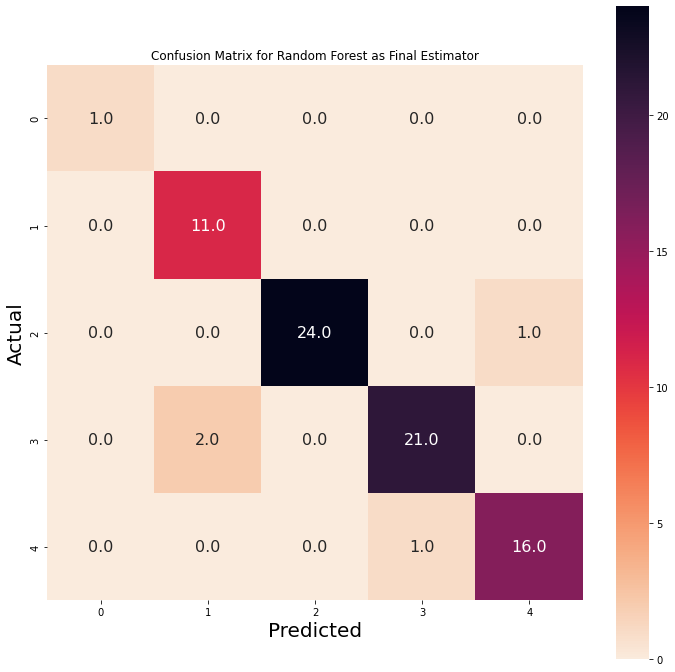

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchrandom_pred
label=['0','1', '2','3','4']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Random Forest as Final Estimator")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**Stacking Classifier - Neural Network**

In [ ]:
newgsearchnnc =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc)
newgsearchnnc.fit(X_train, Y_train)
newgsearchnnc_pred = newgsearchnnc.predict(X_test)
newgsearchnnc_acc=accuracy_score(Y_test, newgsearchnnc_pred)
print(newgsearchnnc_acc)

0.9090909090909091


In [ ]:
print(classification_report(Y_test, newgsearchnnc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.82      0.78        11
           2       0.96      0.96      0.96        25
           3       0.91      0.91      0.91        23
           4       0.94      0.94      0.94        17

    accuracy                           0.91        77
   macro avg       0.71      0.73      0.72        77
weighted avg       0.90      0.91      0.90        77



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

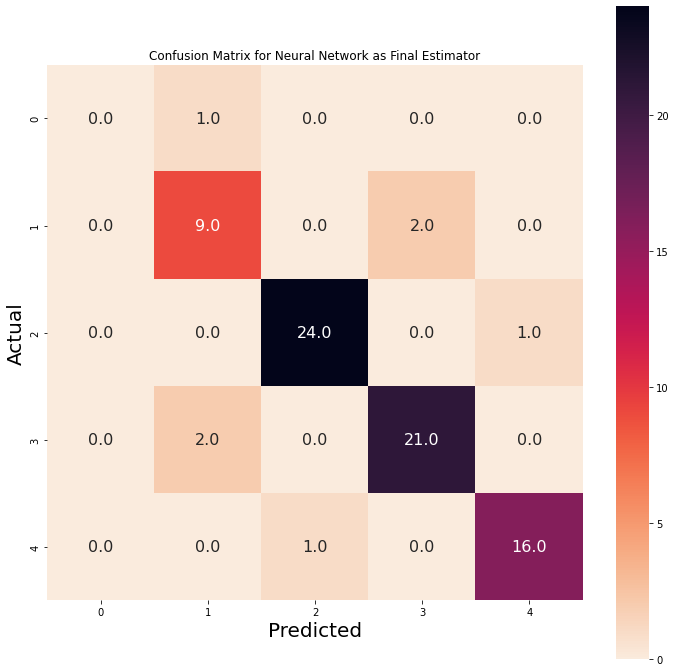

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchnnc_pred
label=['0','1', '2','3','4']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network as Final Estimator")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**Stacking - Final estimator KNN**

In [ ]:
newgsearchknn =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=knn)
newgsearchknn.fit(X_train, Y_train)
newgsearchknn_pred = newgsearchknn.predict(X_test)
newgsearchknn_acc=accuracy_score(Y_test, newgsearchknn_pred)
print(newgsearchknn_acc)

0.8831168831168831


In [ ]:
print(classification_report(Y_test, newgsearchknn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      0.73      0.70        11
           2       1.00      0.96      0.98        25
           3       0.83      0.83      0.83        23
           4       0.94      0.94      0.94        17

    accuracy                           0.88        77
   macro avg       0.89      0.89      0.89        77
weighted avg       0.89      0.88      0.88        77



Text(0.5, 145.31999999999996, 'Predicted')

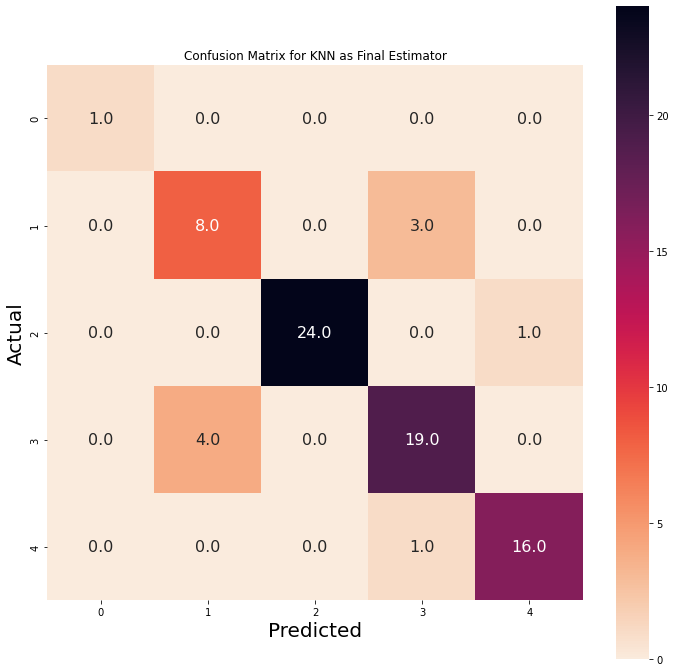

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchknn_pred 
label=['0','1', '2','3','4']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for KNN as Final Estimator")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)